In [1]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using ProgressBars, JuMP, Gurobi

const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-03
Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-03


ConvexHullPricing.Optimizer

In [2]:
ThermalGen = ConvexHullPricing.Utilitaries.ThermalGen(
    MinRunCapacity = [6],
    MaxRunCapacity = [16],
    RampUp = [5],
    RampDown = [5],
    StartUp = [6],
    ShutDown = [6],
    UpTime = [1],
    DownTime = [1],
    NoLoadConsumption = [10],
    MarginalCost = [53],
    FixedCost = [30],
)
instance = ConvexHullPricing.Utilitaries.Instance(
    LostLoad = 3000,
    Load = [6 11 16 11],
    ThermalGen = ThermalGen
)
X0 = UT.LP_Relaxation(instance)
ObjM = UT.Matching(instance).Obj
FS = -127548.0

-127548.0

In [17]:
BEinstances = []
for file in readdir("..\\data\\belgian"; join=true)
    push!(BEinstances, UT.load_data(file))
end

instance = BEinstances[6]
X0 = UT.LP_Relaxation(instance)
Obj0 = UT.Matching(instance).Obj
FS = maximum(load_object("..\\results\\december\\UltraOptimalRunsBE.jld2")[6][3])

-2.555339664864983e9

In [26]:
τ = 900
x_starLM, iteratesLM, f_iteratesLM, time_vectorLM = OPT.tBundleLevelMethod(instance, X0, τ, .95)
x_starPLM, iteratesPLM, f_iteratesPLM, time_vectorPLM = OPT.tBPLM(instance, X0, τ, .99)
# x_starDSM, iteratesDSM, f_iteratesDSM, time_vectorDSM = OPT.tDoublyStabilizedBundleMethod(instance, X0, τ, .7, 1.)

┌ Info: UB = 2.555339467084579e9, LB = 2.5553315089205933e9, UB-LB = 7958.1639857292175
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleLevelMethod.jl:151


┌ Info: UB = 2.5553395189843802e9, LB = 2.5553224767597017e9, UB-LB = 17042.224678516388
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleProximalMethod.jl:307


([47.47594697787372, 45.5952189868957, 45.618578189983964, 45.51849759231334, 44.651404839833276, 46.55704762358778, 39.27438397548008, 49.59050000233685, 42.2496000326513, 46.71038228623502  …  47.46002366433629, 43.86137735594207, 44.988518260321825, 47.36149746448302, 45.21569796185236, 44.74270022038479, 46.02374616784368, 44.495437309892054, 44.135692143855294, 43.47781191310082], [[47.4682, 45.40111900618594, 45.803539506974786, 44.4739, 44.4739, 44.4739, 42.62419286057494, 45.28063247968028, 44.38513812217332, 45.27817300595931  …  47.44950054292583, 43.4767, 45.273213251231525, 47.81593622422252, 45.461554334449175, 45.47240781290494, 45.48768819172297, 44.4739, 44.125773526595744, 44.12577352659575], [56.773628676666135, 44.58200695973926, 44.295099754949774, 48.20319780346222, 46.85658986963085, 45.330832321543085, 39.471159649676224, 42.89495678317962, 38.42542762125697, 33.69017879048545  …  46.799783414239414, 41.95850555147911, 42.755165099087435, 45.95516830032773, 41.82

In [28]:
function make_it_monotone(array)
    new_array = Float64[]
    push!(new_array, array[1])
    for elt in array[2:end]
        if elt < minimum(new_array)
            push!(new_array, elt)
        else
            push!(new_array, minimum(new_array))
        end
    end
    return new_array
end
LM = make_it_monotone(FS .- f_iteratesLM)
PLM = make_it_monotone(FS .- f_iteratesPLM)

746-element Vector{Float64}:
 2102.1980781555176
 2102.1980781555176
 2102.1980781555176
 2102.1980781555176
 2102.1980781555176
 2102.1980781555176
 2102.1980781555176
 2102.1980781555176
 2102.1980781555176
 2102.1980781555176
    ⋮
 -145.8806028366089
 -145.8806028366089
 -145.8806028366089
 -145.8806028366089
 -145.8806028366089
 -145.8806028366089
 -145.8806028366089
 -145.8806028366089
 -145.8806028366089

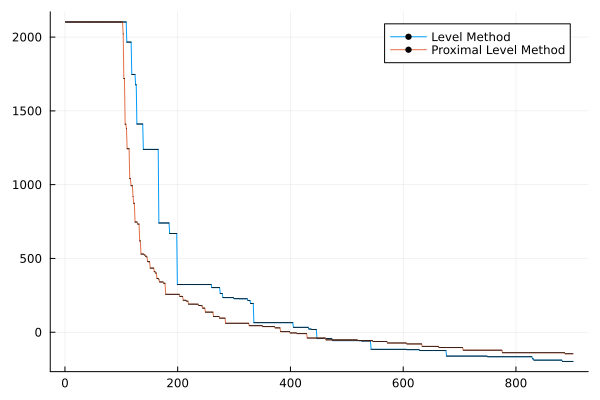

In [31]:
plot(time_vectorLM[2:end], LM, label = "Level Method", markershape=:circle, markersize=.1)
plot!(time_vectorPLM[2:end], PLM, label = "Proximal Level Method", markershape=:circle, markersize = .1)